# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Qayyim Mafaza
- **Email:** qmafaza@student.uns.ac.id
- **ID Dicoding:** 555

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Apakah penggunaan sepeda lebih tinggi pada hari kerja atau akhir pekan, dan apakah hari libur berpengaruh terhadap penggunaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

Pada dataset kali ini data yang digunakan terdiri dari 2 tabel. Tabel tersebut akan dimuat satu per satu sebagai berikut.

- **Memuat Tabel Day (Data Per Hari)**

In [2]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df seperti pada gambar di bawah ini.

- **Memuat Tabel Hour (Data Per Jam)**

In [3]:
hour_df = pd.read_csv("data/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode di atas akan menampilkan 5 baris pertama dari DataFrame hour_df.

**Insight:**
- Data day_df berisi data penggunaan sistem berbagi sepeda setiap harinya selama periode waktu tertentu, dengan berbagai variabel yang merekam faktor cuaca, hari, dan jumlah pengguna sepeda.
- Data hour_df berisi data penggunaan sistem berbagi sepeda setiap jam selama periode waktu tertentu, dengan berbagai variabel yang merekam faktor cuaca, hari, dan jumlah pengguna sepeda.
- Jika mengacu dari sumber data, periode waktu yang diambil dimulai dari tahun 2010 sampai 2011 (yr = 0 berarti 2010 dan yr = 1 berarti 2011).
- Pengguna sepeda dibagi menjadi dua yaitu pengguna kasual (tidak berlangganan) dan pengguna yang terdaftar (berlangganan).
- Variabel musim di sini direpresentasikan oleh angka. Mengacu dari sumber data penjelasan untuk tiap angka adalah sebagai berikut:
  1. Musim semi
  2. Musim panas
  3. Musim gugur
  4. Musim dingin
- Variabel situasi cuaca di sini direpresentasikan oleh angka. Mengacu dari sumber data penjelasan untuk tiap angka adalah sebagai berikut:
  1. Cerah, Sedikit awan, Berawan sebagian
  2. Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
  3. Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, Hujan Ringan + Awan tersebar
  4. Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
- Terdapat dua jenis variabel suhu yang ditampilkan, yaitu suhu yang dinormalisasi dan suhu yang dirasakan. Variabel tersebut direpresentasikan dalam bilangan desimal yang merupakan hasil pembagian suhu sebenarnya (dalam celcius) dengan nilai maksimal 41 untuk suhu yang dinormalisasi dan dengan nilai maksimal 50 untuk suhu yang dirasakan.
- Selain itu, variabel kelembaban dan kecepatan angin juga direpresentasikan dalam bilangan desimal. Variabel kelembaban diambil dari nilai asli kelembaban dalam persentase kemudian dikonversi ke skala antara 0 dan 1. Sedangkan variabel kecepatan angin merupakan hasil pembagian dari kecepatan angin sebenarnya (mungkin meter per detik) dibagi dengan nilai maksimal 67.


### Assessing Data

- **Menilai data day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada day_df telah lengkap dan tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan pada kolom dteday yang seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

Selanjutnya, dicek apakah terdapat duplikasi data dalam day_df. Untuk memeriksa hal ini, jalankan source code berikut.

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dapat dilihat bahwa data day_df tidak memiliki data duplikasi sehingga kita bisa lanjut ke langkah berikutnya.

Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Untuk memeriksa hal ini, jalankan source code berikut.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat diperhatikan bahwa tidak terdapat keanehan nilai pada day_df.

- **Menilai data hour_df**

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada hour_df telah lengkap dan tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan pada kolom dteday yang seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

Berikutnya, kita perlu memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada hour_df. Proses ini dilakukan dengan menjalankan kode berikut.

In [8]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat diperhatikan bahwa tidak terdapat duplikasi dan keanehan nilai pada hour_df

**Insight:**
- Data day_df memiliki kesalahan tipe data pada kolom dteday yang seharusnya bertipe data datetime, bukan object.
- Data hour_df memiliki kesalahan tipe data pada kolom dteday yang seharusnya bertipe data datetime, bukan object.

### Cleaning Data

- **Membersihkan data day_df**

Masalah yang dimiliki data day_df hanyalah tipe data pada kolom dteday yang tidak sesuai. Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas. Untuk melakukan hal tersebut, jalankan source code berikut.

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Source code di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dapat dilihat bahwa tipe data pada kolom dteday telah berubah menjadi datetime.

- **Membersihkan data hour_df**

Masalah yang dimiliki pada data hour_df sama seperti masalah pada data day_df sehingga kita hanya perlu melakukan hal yang sama.

In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Periksa kembali tipe data tersebut untuk memastikan hal ini berjalan sesuai harapan

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat bahwa tipe data pada kolom dteday telah berubah menjadi datetime.

**Insight:**
- Data day_df telah dibersihkan dengan mengubah tipe data kolom dteday menjadi datetime.
- Data hour_df telah dibersihkan dengan mengubah tipe data kolom dteday menjadi datetime.

## Exploratory Data Analysis (EDA)

### Ekplorasi Data day_df
Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data day_df menggunakan method describe().

In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah sepeda yang disewa setiap harinya berjumlah di kisaran 22 hingga 8714 dengan rata-rata sebanyak 4504.348837.

Selanjutnya, kita akan mengelompokkan jumlah sepeda yang dipinjam berdasarkan cuaca.

In [14]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Kode di atas akan menghasilkan sebuah pivot table. Ia memuat informasi jumlah sepeda yang dikelompokkan berdasarkan. Dari table tersebut dapat dilihat bahwa jumlah sepeda yang disewakan paling banyak pada saat cuaca Cerah, Sedikit awan, Berawan sebagian (dilambangkan angka 1). Selain itu, dari table di atas ditunjukkan tidak ada sepeda yang disewakan pada saat cuaca Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut (dilambangkan angka 4).

Selanjutnya, kita akan mengelompokkan jumlah sepeda yang dipinjam menurut hari dalam sepekan.

In [15]:
day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


Dari table tersebut dapat dilihat bahwa jumlah sepeda yang disewakan paling banyak pada saat weekend yaitu hari Minggu dan Sabtu (dilambangkan angka 0 dan 6).

Selanjutnya, kita akan mengelompokkan jumlah sepeda yang dipinjam berdasarkan apakah hari tersebut merupakan hari kerja atau hari libur.

In [16]:
day_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


Dari table tersebut dapat dilihat bahwa jumlah sepeda pengguna kasual lebih banyak pada hari libur, sedangkan jumlah sepeda pengguna yang terdaftar atau berlangganan lebih banyak pada hari kerja.

Selanjutnya, kita akan melihat pola penggunaan sepeda antara pengguna kasual dan pengguna yang terdaftar pada setiap bulannya setiap tahun.
Untuk mendapatkan pola penggunaan sepeda pada tahun 2010, jalankan source code berikut.

In [17]:
day_df[day_df['yr'] == 0].groupby('mnth').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
mnth,,
1,3073,35116
2,6242,41973
3,12826,51219
4,22346,72524
5,31050,104771
6,30612,112900
7,36452,104889
8,28842,107849
9,26545,100873


Untuk mendapatkan pola penggunaan sepeda pada tahun 2011, jalankan source code berikut.

In [18]:
day_df[day_df['yr'] == 1].groupby('mnth').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
mnth,,
1,8969,87775
2,8721,94416
3,31618,133257
4,38456,135768
5,44235,151630
6,43294,159536
7,41705,161902
8,43197,171306
9,43778,174795


Dari kedua table di atas, dapat dilihat bahwa jumlah peminjaman sepeda pengguna yang terdaftar relatif lebih konsisten tiap bulannya dibandingkan dengan pengguna kasual.

### Ekplorasi Data hour_df
Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data hour_df

In [19]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah sepeda yang disewa setiap jamnya berjumlah di kisaran 1 hingga 977 dengan rata-rata sebanyak 189.463088.

Selanjutnya, kita akan mencari jam puncak penggunaan sepeda baik oleh pengguna yang terdaftar maupun tidak terdaftar.

Untuk melihat puncak jam penggunaan sepeda kasual, jalankan source code berikut.

In [20]:
hour_df.groupby('hr').casual.sum().sort_values(ascending=False)

hr
14    55089
15    54606
17    54220
16    53834
13    52713
12    49718
18    44496
11    43286
19    35505
10    33789
20    26378
9     22458
21    20570
22    16200
8     15761
23    11065
7      8037
0      7375
1      4709
2      3412
6      3017
3      1893
5      1012
4       874
Name: casual, dtype: int64

Didapatkan bahwa puncak jam penggunaan sepeda kasual yaitu pada jam 14 atau jam 2 siang.

Untuk melihat puncak jam penggunaan sepeda kasual, jalankan source code berikut.

In [21]:
hour_df.groupby('hr').registered.sum().sort_values(ascending=False)

hr
17    282640
18    265276
8     245240
19    191284
16    173914
7     146134
20    138172
9     136980
12    134696
13    132206
15    128543
14    120563
11    108034
21    104875
10     92468
22     79412
23     52876
6      52115
0      31755
1      19455
5      13249
2      12940
3       6281
4       3554
Name: registered, dtype: int64

Didapatkan bahwa puncak jam penggunaan sepeda kasual yaitu pada jam 17 atau jam 5 sore.

Untuk melihat puncak jam penggunaan sepeda keseluruhan, jalankan source code berikut.

In [22]:
hour_df.groupby('hr').cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

Didapatkan bahwa puncak jam penggunaan sepeda secara keseluruhan yaitu pada jam 17 atau jam 5 sore.

**Insight:**
- Jumlah penggunaan sepeda tiap harinya berkisar antara 22 hingga 8714.
- Jumlah penggunaan sepeda tiap jamnya berkisar antara 1 hingga 977.
- Jam puncak penggunaan sepeda kasual adalah jam 2 siang, sedangkan jam puncak penggunaan sepeda terdaftar adalah jam 5 sore.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

Untuk menjawab pertanyaan pertama, kita perlu membuat sebuah DataFrame baru untuk menampung informasi terkait rata-rata jumlah penyewaan sepeda berdasarkan cuaca.

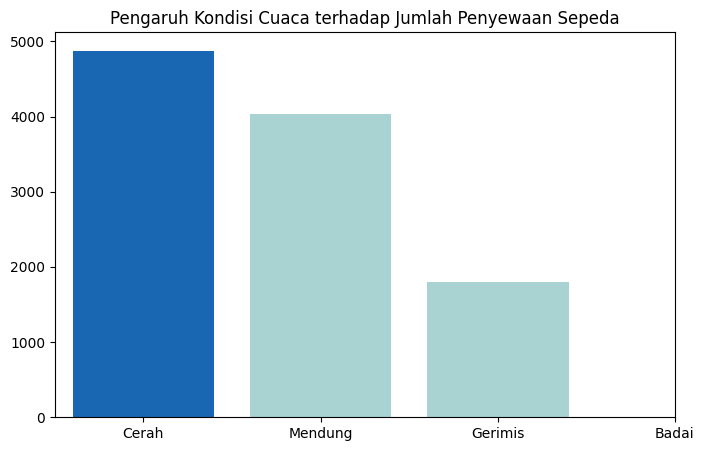

In [23]:
weather_rentals = day_df.groupby('weathersit')['cnt'].mean().reset_index()

max_rental = weather_rentals['cnt'].max()

weather_rentals['highlight'] = weather_rentals['cnt'].apply(lambda x: 'Tertinggi' if x == max_rental else 'Lainnya')

plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', hue='highlight', data=weather_rentals, palette={'Tertinggi': '#06C', 'Lainnya': '#A2D9D9'}, legend=False)

plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Gerimis', 'Badai'])

plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa jumlah penyewaan sepeda paling tinggi terjadi pada saat cuaca cerah. Selain itu, dapat diketahui juga pada saat cuaca badai, tidak ada yang menyewa sepeda sama sekali.

### Pertanyaan 2: Apakah penggunaan sepeda lebih tinggi pada hari kerja atau akhir pekan, dan apakah hari libur berpengaruh terhadap penggunaan?

Untuk menjawab pertanyaan kedua, kita perlu membuat sebuah DataFrame baru untuk menampung informasi terkait rata-rata jumlah penyewaan sepeda berdasarkan cuaca.

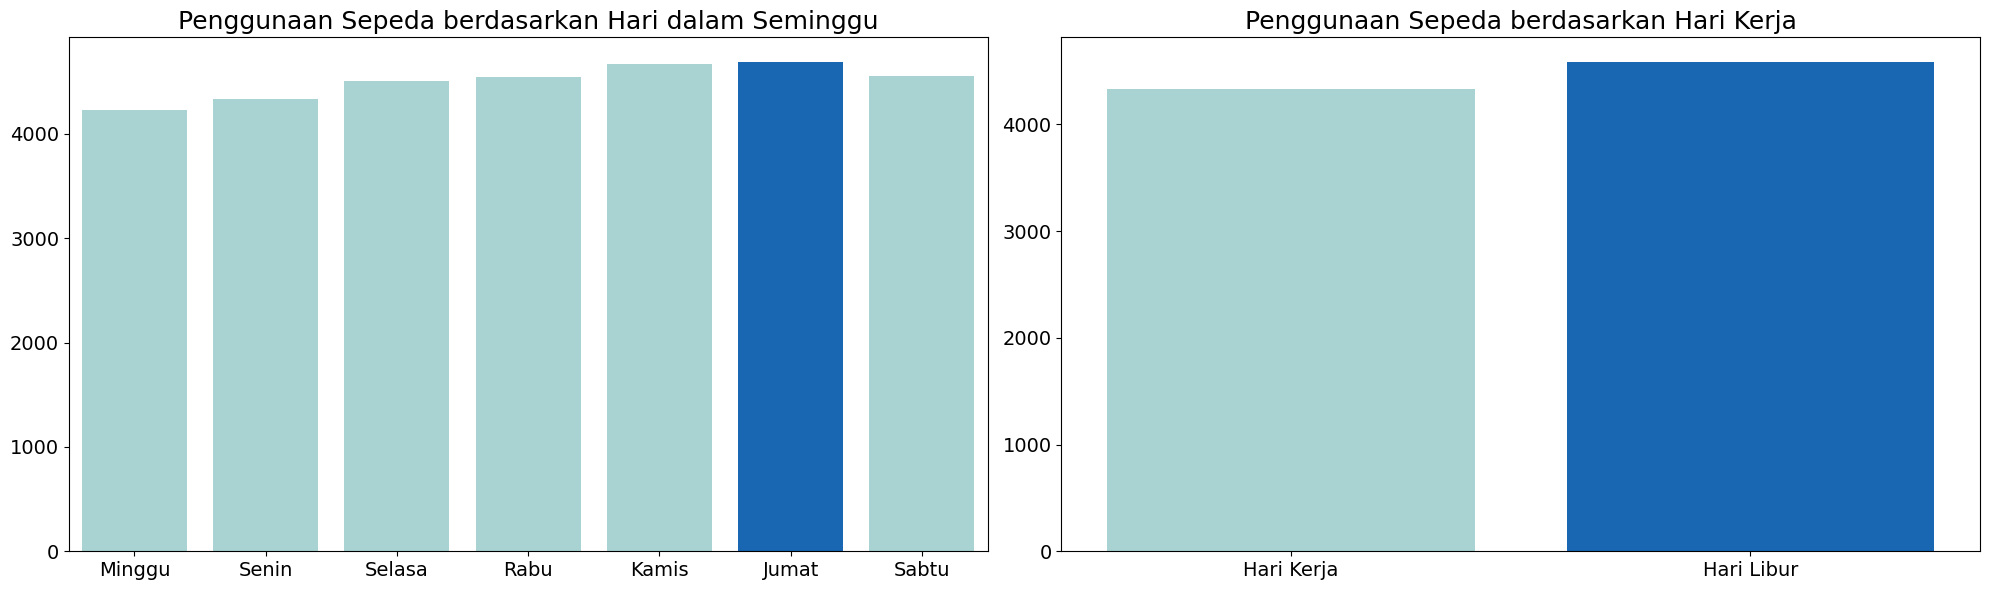

In [24]:
weekday_summary = day_df.groupby('weekday')['cnt'].mean().reset_index()
workingday_summary = day_df.groupby('workingday')['cnt'].mean().reset_index()

weekday_max = weekday_summary['cnt'].max()
workingday_max = workingday_summary['cnt'].max()

weekday_summary['highlight'] = weekday_summary['cnt'].apply(lambda x: 'Tertinggi' if x == weekday_max else 'Lainnya')
workingday_summary['highlight'] = workingday_summary['cnt'].apply(lambda x: 'Tertinggi' if x == workingday_max else 'Lainnya')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(x="weekday", y="cnt", hue='highlight', data=weekday_summary, palette={'Tertinggi': '#06C', 'Lainnya': '#A2D9D9'}, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Penggunaan Sepeda berdasarkan Hari dalam Seminggu", fontsize=18)
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[0].set_xticklabels(['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
ax[0].tick_params(axis='both', labelsize=14)

sns.barplot(x="workingday", y="cnt", hue='highlight', data=workingday_summary, palette={'Tertinggi': '#06C', 'Lainnya': '#A2D9D9'}, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Penggunaan Sepeda berdasarkan Hari Kerja", fontsize=18)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Hari Kerja', 'Hari Libur'])
ax[1].tick_params(axis='both', labelsize=14)


plt.tight_layout()
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa jumlah penyewaan sepeda paling tinggi terjadi pada saat hari Jumat dan pada hari libur.

**Insight:**
- Jumlah penyewaan sepeda paling tinggi terjadi pada saaat cuaca cerah dan tidak ada penyewaan sepeda yang terjadi pada saat cuaca badai.
- Jumlah penyewaan sepeda paling tinggi dalam seminggu terjadi pada hari Jumat dan jumlah penyewaan sepeda pada hari libur lebih tinggi dibandingkan pada hari kerja.

## Analisis Lanjutan (Opsional)

Kita ingin melakukan clustering dari data tersebut untuk mencari jumlah penggunaan sepeda berdasarkan kelembaban (hum). 
Kategori kelembaban ditunjukkan sebagai berikut.
- Rendah: 0.0 - 0.4
- Sedang: 0.4 - 0.7
- Tinggi: 0.7 - 1.0

Buat kolom baru dalam DataFrame untuk menunjukkan kategori kelembaban berdasarkan batasan yang telah ditentukan. Hal ini dilakukan dengan memanggil fungsi yang kita buat untuk mengkategorikan data berdasarkan kelembaban.

In [25]:
def categorize_humidity(humidity):
    if humidity < 0.4:
        return 'Rendah'
    elif humidity < 0.7:
        return 'Sedang'
    else:
        return 'Tinggi'

day_df['hum_category'] = day_df['hum'].apply(categorize_humidity)

day_df.groupby(by="hum_category").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
hum_category,,,
Rendah,25256,100745,126001
Sedang,420624,1813398,2234022
Tinggi,174137,758519,932656


Kemudian dilakukan visualisasi data dari clustering yang telah dilakukan.

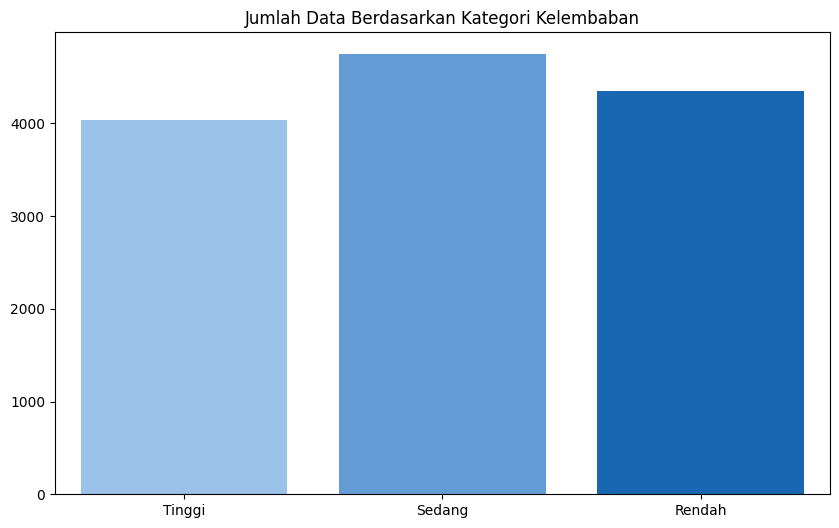

In [26]:
colors = ["#8BC1F7", "#519DE9", "#06C"]

plt.figure(figsize=(10, 6))
sns.barplot(x='hum_category', y='cnt', data=day_df, hue='hum_category', palette=colors, legend=False, errorbar=None)
plt.title('Jumlah Data Berdasarkan Kategori Kelembaban')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Dari visualisasi data tersebut dapat dilihat bahwa jumlah penyewaan sepeda tertinggi terjadi pada saat tingkat kelembaban sedang.

## Conclusion

- Kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda. Dari analisis data, terlihat bahwa jumlah penyewaan sepeda paling tinggi terjadi pada saat cuaca cerah. Sebaliknya, tidak ada penyewaan sepeda yang terjadi pada saat kondisi cuaca badai. Hal ini menunjukkan bahwa faktor cuaca merupakan determinan penting dalam keputusan pengguna untuk menyewa sepeda.
- Penggunaan sepeda lebih tinggi pada akhir pekan dibandingkan pada hari kerja. Jumlah penyewaan sepeda paling tinggi dalam seminggu terjadi pada hari Jumat, menunjukkan kecenderungan masyarakat untuk lebih aktif bersepeda menjelang akhir pekan. Selain itu, data menunjukkan bahwa jumlah penyewaan sepeda pada hari libur lebih tinggi dibandingkan dengan hari kerja. Hal ini menunjukkan bahwa pengguna cenderung memanfaatkan waktu luang, seperti hari libur dan akhir pekan, untuk bersepeda.